In [3]:
l=["Liked","Liked","Liked","Liked","Liked","Liked","Liked","Liked","Liked","Dislike","Dislike","Dislike","Dislike","Dislike","Liked","Dislike","Dislike","Dislike","Dislike","Dislike"]
for i in range(20):
    file1 = open("test_labels/nour/"+str(i+1)+".txt","w")
    file1.write(l[i])
    file1.close()

l=["Dislike","Liked","Liked","Liked","Liked","Liked","Dislike","Liked","Dislike","Dislike","Dislike","Dislike","Dislike","Dislike","Liked","Dislike","Liked","Dislike","Dislike","Dislike"]
for i in range(20):
    file1 = open("test_labels/youssef/"+str(i+1)+".txt","w")
    file1.write(l[i])
    file1.close()
    
l=["Liked","Liked","Liked","Dislike","Liked","Liked","Liked","Liked","Liked","Liked","Dislike","Liked","Dislike","Dislike","Dislike","Liked","Dislike","Dislike","Dislike","Liked"]
for i in range(20):
    file1 = open("test_labels/islam/"+str(i+1)+".txt","w")
    file1.write(l[i])
    file1.close()
    
l=["Liked","Liked","Liked","Liked","Liked","Liked","Liked","Liked","Liked","Liked","Dislike","Dislike","Dislike","Liked","Liked","Dislike","Dislike","Dislike","Liked","Dislike"]
for i in range(20):
    file1 = open("test_labels/mostafa/"+str(i+1)+".txt","w")
    file1.write(l[i])
    file1.close()





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal 
import pywt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score
import statistics
from sklearn.svm import SVC
import six
import sys
sys.modules['sklearn.externals.six'] = six
from scipy.special import logsumexp
sys.modules['scipy.misc.logsumexp'] = logsumexp
from seqlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

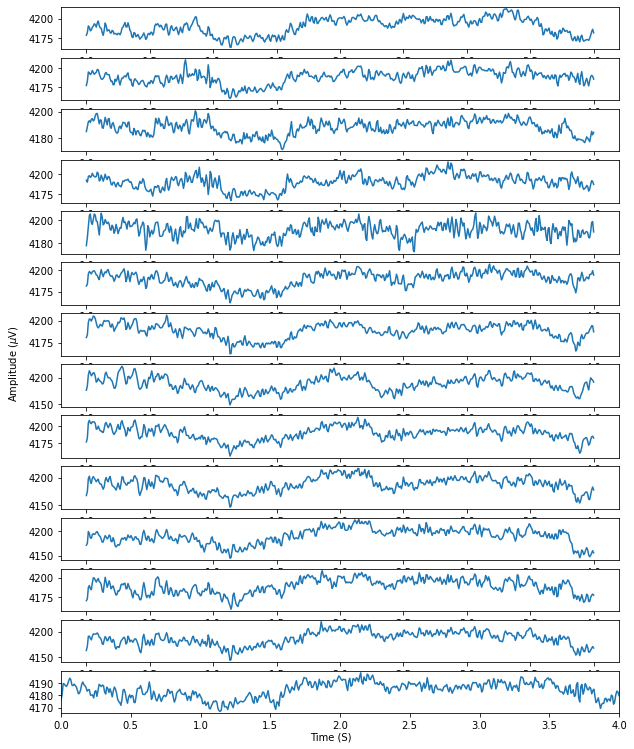

In [2]:
time = np.linspace(0, 4, 513)
# first_item_first_user = pd.read_csv("data/nour/nour_1.txt",sep=" ",header=None,names=["1st", "2nd", "3rd", "4th","5th","6th","7th","8th","9th","10th","11th","12th","13th","14th"])
f = open("data/mostafa3/mostafa_1.txt", "r")
string =f.read()
first_item_first_user ={
    '1st':[],
    '2nd':[],
    '3rd':[],
    '4th':[],
    '5th':[],
    '6th':[],
    '7th':[],
    '8th':[],
    '9th':[],
    '10th':[],
    '11th':[],
    '12th':[],
    '13th':[],
    '14th':[]
}
my = string.split('\n')
ny=[]
for electrode in my :
    ny = electrode.split('\t')
    if(ny[0]==''):
        break
    first_item_first_user['1st'].append(float(ny[0]))
    first_item_first_user['2nd'].append(float(ny[1]))
    first_item_first_user['3rd'].append(float(ny[2]))
    first_item_first_user['4th'].append(float(ny[3]))
    first_item_first_user['5th'].append(float(ny[4]))
    first_item_first_user['6th'].append(float(ny[5]))
    first_item_first_user['7th'].append(float(ny[6]))
    first_item_first_user['8th'].append(float(ny[7]))
    first_item_first_user['9th'].append(float(ny[8]))
    first_item_first_user['10th'].append(float(ny[9]))
    first_item_first_user['11th'].append(float(ny[10]))
    first_item_first_user['12th'].append(float(ny[11]))
    first_item_first_user['13th'].append(float(ny[12]))
    first_item_first_user['14th'].append(float(ny[13]))
#     print(user_data)
first_item_first_user= pd.DataFrame.from_dict(first_item_first_user)
first_electrode = first_item_first_user['1st']
fig, axs = plt.subplots(14)
fig.set_size_inches(10, 13)
# fig.suptitle('14 electrodes for first trail')
axs[0].plot(time, first_item_first_user['1st'], label="1st elect 1st exp")
axs[1].plot(time, first_item_first_user['2nd'], label="2nd elect 1st exp")
axs[2].plot(time, first_item_first_user['3rd'], label="3rd elect 1st exp")
axs[3].plot(time, first_item_first_user['4th'], label="4th elect 1st exp")
axs[4].plot(time, first_item_first_user['5th'], label="5th elect 1st exp")
axs[5].plot(time, first_item_first_user['6th'], label="6th elect 1st exp")
axs[6].plot(time, first_item_first_user['7th'], label="7th elect 1st exp")
axs[7].plot(time, first_item_first_user['8th'], label="8th elect 1st exp")
axs[8].plot(time, first_item_first_user['9th'], label="9th elect 1st exp")
axs[9].plot(time, first_item_first_user['10th'], label="10th elect 1st exp")
axs[10].plot(time, first_item_first_user['11th'], label="11th elect 1st exp")
axs[11].plot(time, first_item_first_user['12th'], label="12th elect 1st exp")
axs[12].plot(time, first_item_first_user['13th'], label="13th elect 1st exp")
axs[13].plot(time, first_item_first_user['14th'], label="14th elect 1st exp")

# x = statistics.mean(first_electrode)
# first_electrode = [element-x for element in first_electrode]
plt.xlim([0, 4]);
#plt.plot(time, first_electrode, label="1st elect 1st exp")
# plt.xlabel("Time")
# plt.ylabel("Magnitude")
fig.text(0.5, 0.1, 'Time (S)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude ($\mu$V) ', ha='center', va='center', rotation='vertical')
fig.savefig('datasampleex.png', dpi=200) 

plt.show()

In [3]:
def carf(row):
    for i,elect in row.items():
        elect-=statistics.mean(row)
        row[i]= elect
    return row

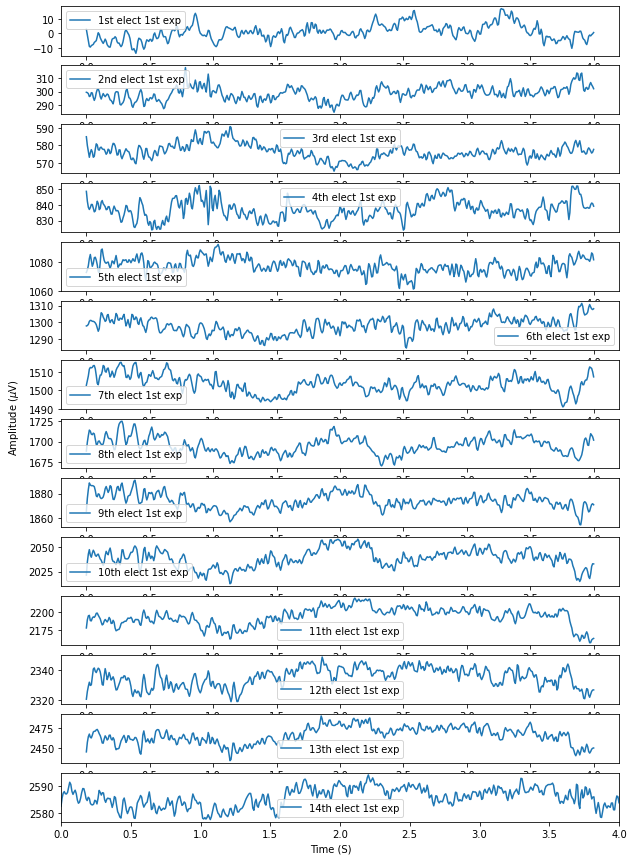

In [4]:
time = np.linspace(0, 4, 513)
# first_item_first_user = pd.read_csv("25-users/Abhishek_3.txt",sep=" ",header=None,names=["1st", "2nd", "3rd", "4th","5th","6th","7th","8th","9th","10th","11th","12th","13th","14th"])
# first_electrode = first_item_first_user['1st']
fig, axs = plt.subplots(14)
fig.set_size_inches(10, 15)
# fig.suptitle('14 electrodes for first trail')


first_item_first_user=pd.DataFrame.from_dict(first_item_first_user)
first_item_first_user.apply(lambda row : carf(row), axis = 1)

s_golay_filtered_signal1 =scipy.signal.savgol_filter(first_item_first_user['1st'],5,2)
s_golay_filtered_signal2 =scipy.signal.savgol_filter(first_item_first_user['2nd'],5,2)
s_golay_filtered_signal3 =scipy.signal.savgol_filter(first_item_first_user['3rd'],5,2)
s_golay_filtered_signal4 =scipy.signal.savgol_filter(first_item_first_user['4th'],5,2)
s_golay_filtered_signal5 =scipy.signal.savgol_filter(first_item_first_user['5th'],5,2)
s_golay_filtered_signal6 =scipy.signal.savgol_filter(first_item_first_user['6th'],5,2)
s_golay_filtered_signal7 =scipy.signal.savgol_filter(first_item_first_user['7th'],5,2)
s_golay_filtered_signal8 =scipy.signal.savgol_filter(first_item_first_user['8th'],5,2)
s_golay_filtered_signal9 =scipy.signal.savgol_filter(first_item_first_user['9th'],5,2)
s_golay_filtered_signal10 =scipy.signal.savgol_filter(first_item_first_user['10th'],5,2)
s_golay_filtered_signal11 =scipy.signal.savgol_filter(first_item_first_user['11th'],5,2)
s_golay_filtered_signal12 =scipy.signal.savgol_filter(first_item_first_user['12th'],5,2)
s_golay_filtered_signal13 =scipy.signal.savgol_filter(first_item_first_user['13th'],5,2)
s_golay_filtered_signal14 =scipy.signal.savgol_filter(first_item_first_user['14th'],5,2)




axs[0].plot(time,s_golay_filtered_signal1 , label="1st elect 1st exp")
axs[1].plot(time,s_golay_filtered_signal2 , label="2nd elect 1st exp")
axs[2].plot(time,s_golay_filtered_signal3 , label="3rd elect 1st exp")
axs[3].plot(time,s_golay_filtered_signal4 , label="4th elect 1st exp")
axs[4].plot(time,s_golay_filtered_signal5 , label="5th elect 1st exp")
axs[5].plot(time,s_golay_filtered_signal6 , label="6th elect 1st exp")
axs[6].plot(time,s_golay_filtered_signal7 , label="7th elect 1st exp")
axs[7].plot(time,s_golay_filtered_signal8 , label="8th elect 1st exp")
axs[8].plot(time,s_golay_filtered_signal9 , label="9th elect 1st exp")
axs[9].plot(time,s_golay_filtered_signal10 , label="10th elect 1st exp")
axs[10].plot(time,s_golay_filtered_signal11 , label="11th elect 1st exp")
axs[11].plot(time,s_golay_filtered_signal12 , label="12th elect 1st exp")
axs[12].plot(time,s_golay_filtered_signal13 , label="13th elect 1st exp")
axs[13].plot(time,s_golay_filtered_signal14 , label="14th elect 1st exp")


plt.xlim([0, 4]);


axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
axs[5].legend()
axs[6].legend()
axs[7].legend()
axs[8].legend()
axs[9].legend()
axs[10].legend()
axs[11].legend()
axs[12].legend()
axs[13].legend()
fig.text(0.5, 0.1, 'Time (S)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude ($\mu$V) ', ha='center', va='center', rotation='vertical')
fig.savefig('datasamplesmoothedex.png', dpi=200) 
plt.show()

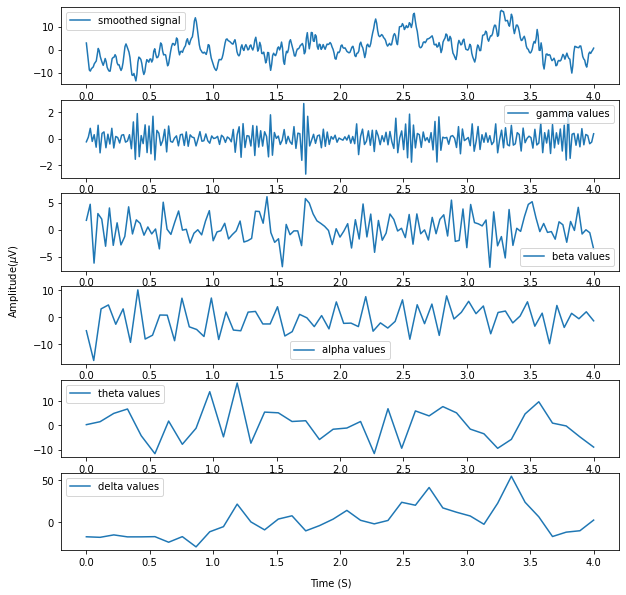

In [5]:
cA, d1 = pywt.dwt(s_golay_filtered_signal1, 'db4')
cA2, d2 = pywt.dwt(cA, 'db4')
cA3, d3 = pywt.dwt(cA2, 'db4')
a4, d4 = pywt.dwt(cA3, 'db4')

fig, axs = plt.subplots(6)
timegama = np.linspace(0, 4, 260)
timebeta = np.linspace(0, 4, 133)
timealpha = np.linspace(0, 4, 70)
timetheta = np.linspace(0, 4, 38)
timedelta = np.linspace(0, 4, 38)
fig.set_size_inches(10, 10)
# fig.suptitle('Filtered Signals')
axs[0].plot(time, s_golay_filtered_signal1, label="smoothed signal")
axs[1].plot(timegama, d1,label= "gamma values")
axs[2].plot(timebeta, d2,label= "beta values")
axs[3].plot(timealpha, d3,label= "alpha values")
axs[4].plot(timetheta, d4, label="theta values")
axs[5].plot(timedelta, a4, label="delta values")
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
axs[5].legend()

fig.text(0.5, 0.08, 'Time (S)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude($\mu$V) ', ha='center', va='center', rotation='vertical')
fig.savefig('fivefrequenciesex.png', dpi=200) 

plt.show()
